## Exploratory Analysis of Census Income Data
* Objective: Predict whether income exceeds $50K/yr based on census data, also known as Adult dataset
* Data cleanup approach: TBD
* Machine Learning Models: TBD

### Source of information: 
* https://archive.ics.uci.edu/dataset/20/census+income



## Step 1 - Install and import the required libraries

In [1]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import balanced_accuracy_score
warnings.filterwarnings("ignore")

import seaborn as sns

-------------------------

## Step 2 - Data Preparation
* Upload all the source files into /resources folder and add column headers: 
  * adult.data - which is used as the train data
  * adult.test - which is used as the test data
  * the 2 datasets are combined into one called census_combined_df going forward
* Check the tables to understand data types, missing values, and fix them for better data quality

In [2]:
# Import the data
census_df = pd.read_csv('./resources/adult.data')
census_test_df = pd.read_csv('./resources/adult.test', skiprows=1) # skip the first row as it might contain headers


In [3]:
# Display the first 10 rows of the data
display(census_df.head(10))
display(census_test_df.head(10))

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [4]:
# Add labels to the columns of the census_df
census_df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

census_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
# Add labels to the columns of the census_test_df
census_test_df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

census_test_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [6]:
# Combine the census_df and census_test_df
census_combined_df = pd.concat([census_df, census_test_df])

In [7]:
# Check how many rows of census_df
census_combined_df.shape

(48840, 15)

In [8]:
# Describe census_df
census_combined_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Check for missing values
census_combined_df.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
# Check unique values in the each column
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt
[ 83311 215646 234721 ... 173449  89686 350977]

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' 

In [11]:
# The workclass, occupation, and native-country columns have a value '?' which means it is a missing value. 
# Note some of these ? have extra spaces around them
# We will replace it with a NaN value
census_combined_df['workclass'] = census_combined_df['workclass'].replace(r'^\s*\?\s*$', np.nan, regex=True)
census_combined_df['occupation'] = census_combined_df['occupation'].replace(r'^\s*\?\s*$', np.nan, regex=True)
census_combined_df['native-country'] = census_combined_df['native-country'].replace(r'^\s*\?\s*$', np.nan, regex=True)

# From all records, remove any extra spaces around any values
census_combined_df = census_combined_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# From all records, remove dot character around any values
census_combined_df = census_combined_df.apply(lambda x: x.str.replace('.', '') if x.dtype == "object" else x)

In [12]:
# Drop all records that contain missing values (NaN)
census_combined_df.dropna(inplace=True)

In [13]:
# Check how many rows of census_df
census_combined_df.shape

(45220, 15)

In [14]:
# Check unique values in the each column
# Make sure there are no "?", ".", or extra spaces in the values
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

workclass
['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

fnlwgt
[ 83311 215646 234721 ... 173449  89686 350977]

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

education-num
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

marital-status
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-F

##### For the Combined datasets, we removed 7.4% data with null values (approx 3604) null values that originally had ? sign. 
##### We now work with 45,220 rows from originally 48840 rows

-------------------------

## Step 3 - Create a visualization for the data 

<Figure size 640x480 with 0 Axes>

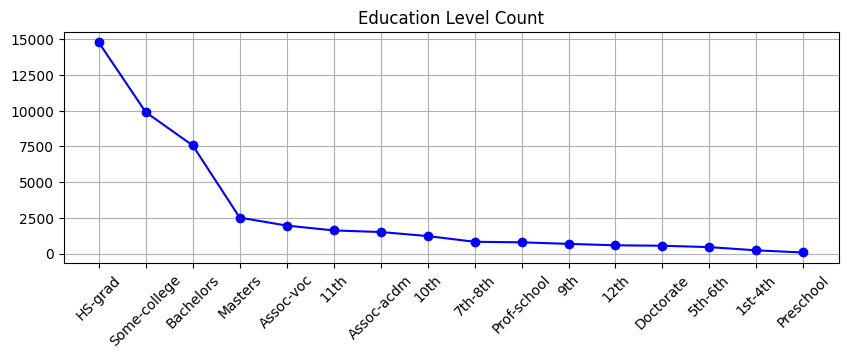

In [15]:
# Create a visualization of the education column

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['education'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Education Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

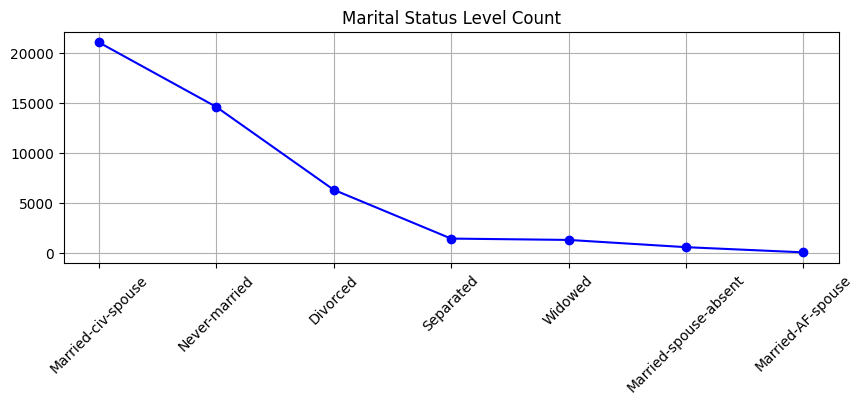

In [16]:
# Create a visualization of the marital status column

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['marital-status'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Marital Status Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

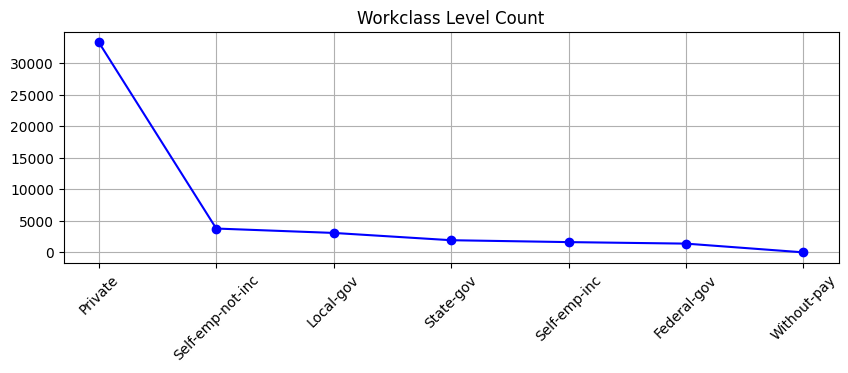

In [17]:
# Create a visualization of the workclass column 
plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['workclass'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Workclass Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

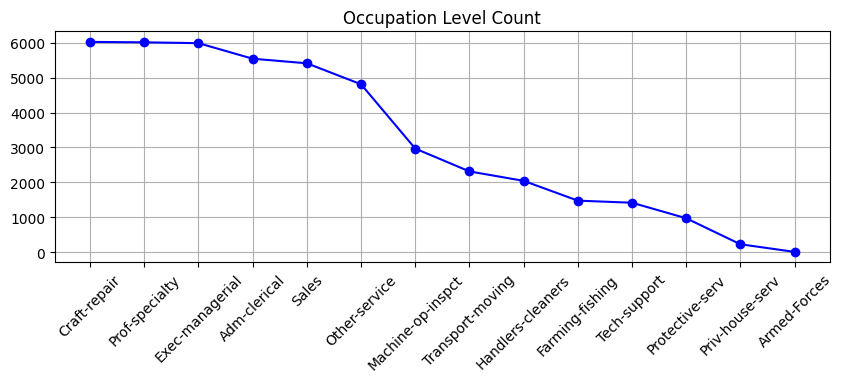

In [18]:
# Create a visualization of the occupation column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['occupation'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Occupation Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

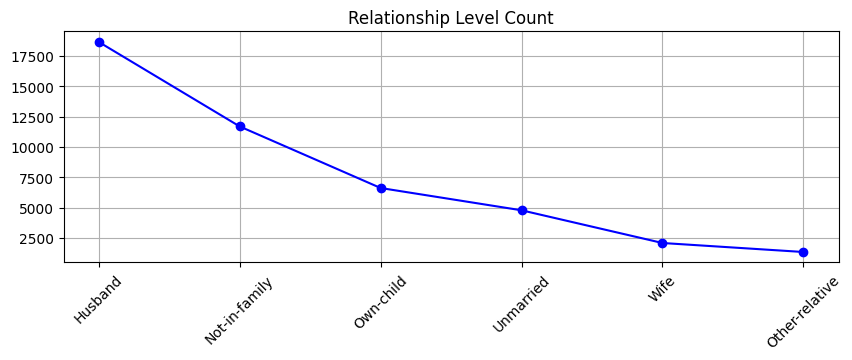

In [19]:
# Create a visualization of the relationship column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['relationship'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Relationship Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

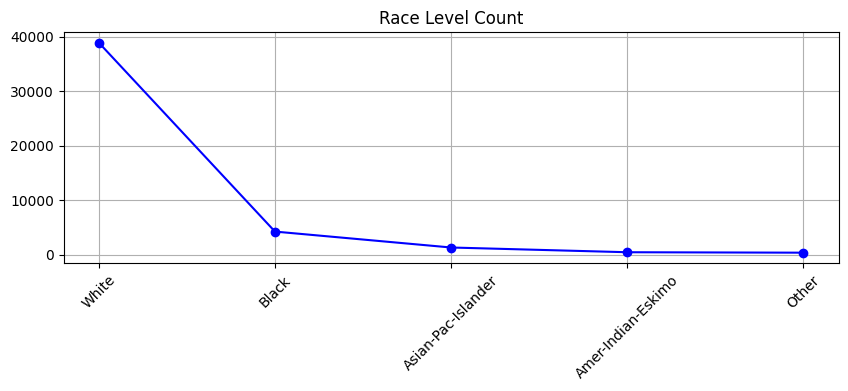

In [20]:
# Create a visualization of the race column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['race'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Race Level Count')
plt.grid(True)
plt.show()

In [21]:
# Create a visualization of the sex column 
plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['sex'].value_counts()

index = np.arange(len(train_work_counts.index))

plt.bar(index - width/2, train_work_counts.values, width, label='Census Data', color='blue')

plt.xticks(index, train_work_counts.index, rotation=45)
plt.title('Gender Level Count')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'width' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

In [ ]:
# Create a visualization of the native country column 
plt.clf()
plt.figure(figsize=(30, 3))
train_work_counts = census_combined_df['native-country'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Native Country Level Count')
plt.grid(True)
plt.show()

In [ ]:
# Create a visualization of the income column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['income'].value_counts()

index = np.arange(len(train_work_counts.index))

plt.bar(index - width/2, train_work_counts.values, width, label='Census Data', color='blue')

plt.xticks(index, train_work_counts.index, rotation=45)
plt.title('Income Level Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Let's drop all records with country not equal to United-States because the majority of the records are from the United States
census_combined_df = census_combined_df[census_combined_df['native-country'] == 'United-States']

In [ ]:
# Check how many rows of census_combined_df
census_combined_df.shape

-------------------------

## Step 4 - Binary Classification 
### Transform datasets from object for the following columns into Binary / Numeric values:
   * workclass
   * education 
   * marital-status
   * occupation
   * relationship
   * race
   * sex
   * native-country
   * income

In [ ]:
# Check data type from census_combined_df
census_combined_df.dtypes